In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

In [7]:
plt.rcParams.update({'font.size':18})

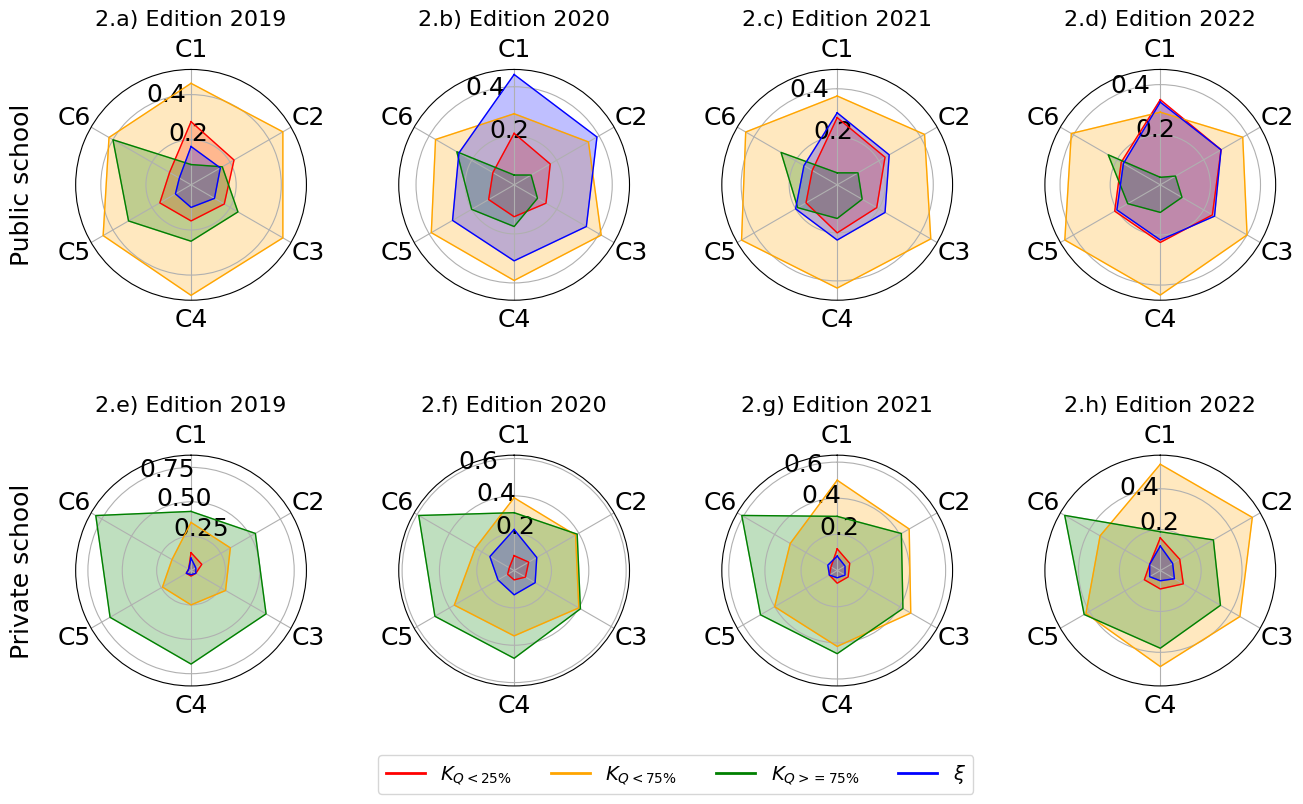

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# Anos e dados para configurar gráficos
anos = [19, 20, 21, 22]
pu = ['a', 'b', 'c', 'd']
pr = ['e', 'f', 'g', 'h']
cores = ['red', 'orange', 'green', 'blue']
categorias = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
N = len(categorias)

# Calcular ângulos para gráficos de radar
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Inicializar listas para armazenar dados processados
dados_publicos = []
dados_privados = []

# Ler e processar dados de cada ano
for ano in anos:
    dados = pd.read_csv(f'data/base_data_20{ano}.csv', sep=',')
    dados.replace({',': '.'}, regex=True, inplace=True)
    dados['Percentual'] = dados['Percentual'].astype(float)
    dados_publicos.append(dados[dados['Dependência ADM'] == 'Publica'])
    dados_privados.append(dados[dados['Dependência ADM'] == 'Privada'])

# Criar figura e subplots para gráficos de radar
fig, axes = plt.subplots(2, 4, subplot_kw={'projection': 'polar'}, figsize=(15, 15))
labels = ['$K_{Q<25\%}$', '$K_{Q<75\%}$', '$K_{Q>=75\%}$', r'$\xi$']

# Loop para plotar gráficos de radar para cada combinação de ano e tipo de escola
for linha in range(2):
    for coluna in range(4):
        ax = axes[linha, coluna]
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categorias)
        ax.set_rlabel_position(-30)

        # Configurar título e rótulo do eixo y apenas na primeira coluna, com labelpad ajustado
        if linha == 0:
            ax.set_title(f"2.{pu[coluna]}) Edition 20{anos[coluna]}", va='bottom', fontsize=16)
            if coluna == 0:
                ax.set_ylabel('Public school', labelpad=30)
            dados = dados_publicos[coluna]
        else:
            ax.set_title(f"2.{pr[coluna]}) Edition 20{anos[coluna]}", va='bottom', fontsize=16)
            if coluna == 0:
                ax.set_ylabel('Private school', labelpad=30)
            dados = dados_privados[coluna]

        # Plotar cada linha de dados com diferentes cores e labels
        for i in range(4):
            valores = dados.iloc[[0 + i, 4 + i, 8 + i, 12 + i, 16 + i, 20 + i], 4].values.flatten().tolist()
            valores += valores[:1]  # Fechar o gráfico de radar
            ax.plot(angles, valores, linewidth=1, color=cores[i], linestyle='solid', label=labels[i])
            ax.fill(angles, valores, alpha=0.25, color=cores[i])

# Ajustar layout e espaço entre subplots
fig.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95, wspace=0.4, hspace=-0.6)

# Criar handles para a legenda com as cores corretas
handles = [Line2D([0], [0], color=cores[i], lw=2) for i in range(4)]
fig.legend(handles=handles, labels=labels, ncol=len(labels), bbox_to_anchor=(0.5, 0.25), loc='upper center', 
           borderaxespad=0.1, fontsize=14)

# Salvar gráfico final como TIFF com alta qualidade
fig.savefig('radar_high_quality.png', format='png', dpi=300, bbox_inches='tight')
plt.show()